In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print(tf.__version__)

tf.random.set_seed(0) # So results are reproducible

2.15.0


# Export data

In [34]:
file = '/content/drive/MyDrive/Data_Samples/Cancer.csv'
raw_data = pd.read_csv(file)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Visualze some of the data segments in relation to each other

In [35]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


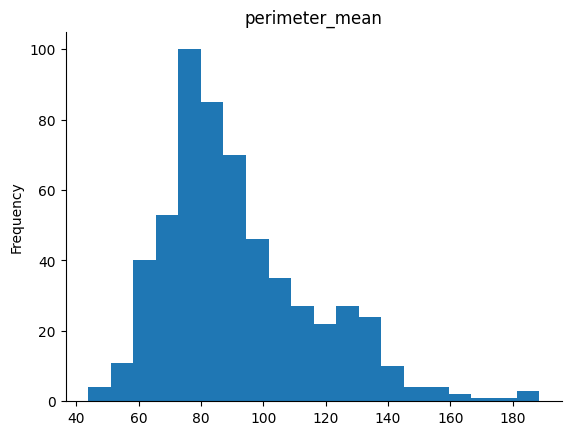

In [36]:
_df_15['perimeter_mean'].plot(kind='hist', bins=20, title='perimeter_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

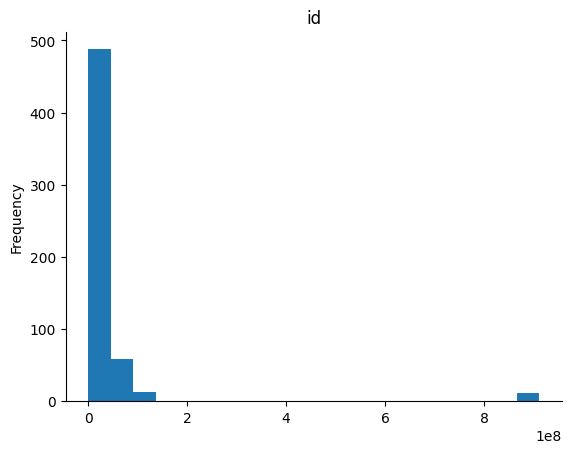

In [37]:
_df_12['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

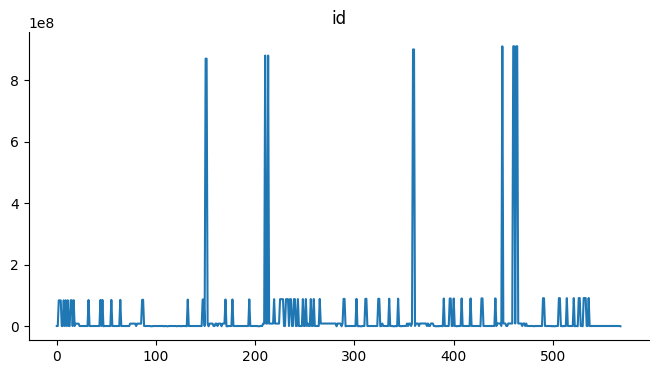

In [38]:
_df_21['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

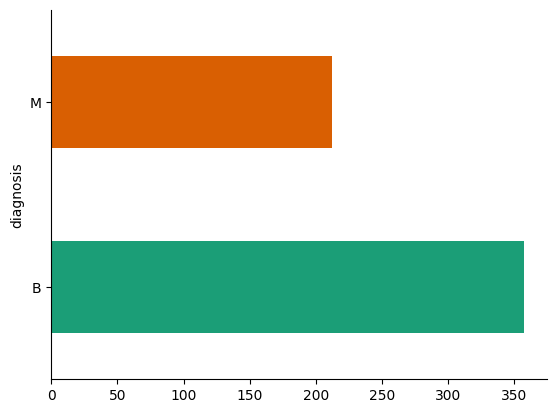

In [39]:
import seaborn as sns
_df_16.groupby('diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

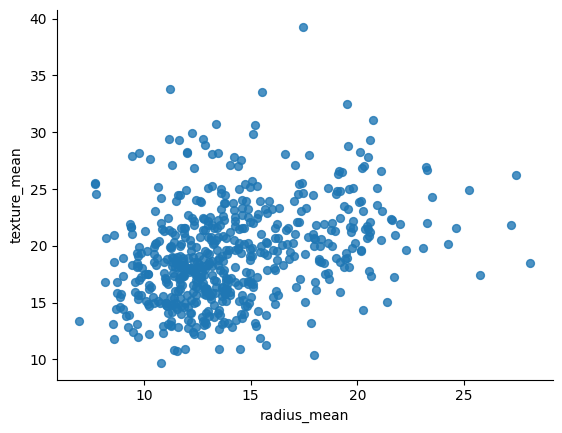

In [40]:
_df_18.plot(kind='scatter', x='radius_mean', y='texture_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

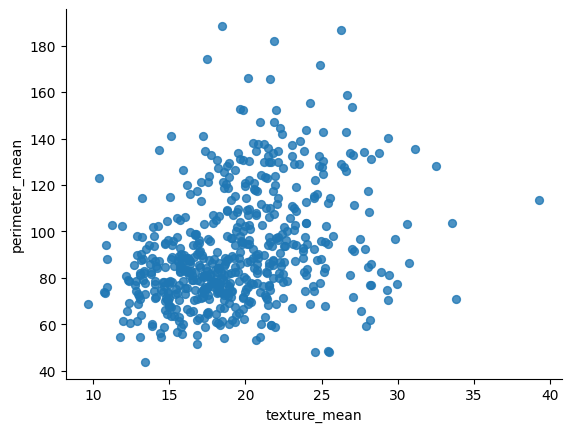

In [41]:
_df_19.plot(kind='scatter', x='texture_mean', y='perimeter_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

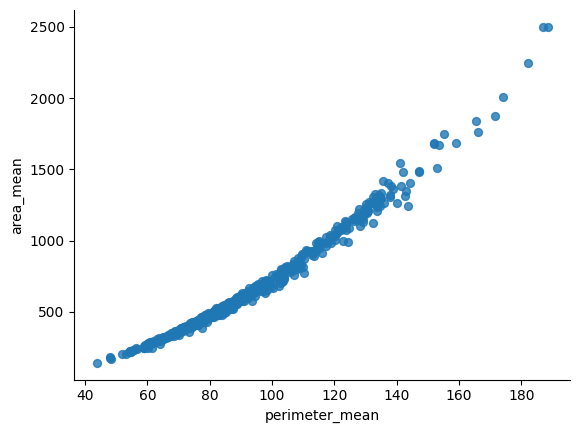

In [42]:
_df_20.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

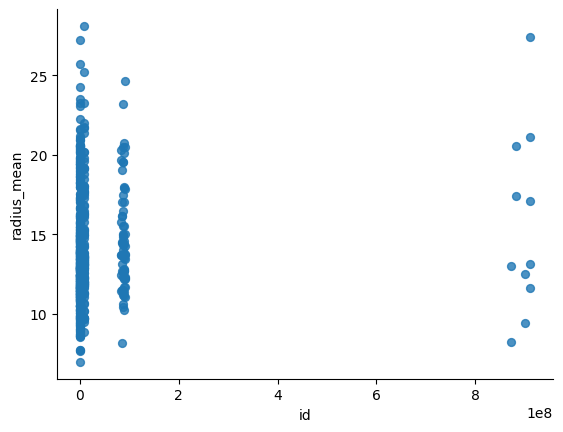

In [43]:
_df_17.plot(kind='scatter', x='id', y='radius_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- Visualizing the models performance and predictions using a function

In [45]:
def plot_decision_boundary(model, X, y):
  # Plots the decision boundary created by a mdoel on X

  # Define axis boundaries on the plot and create a meshgrid
  x_min, x_max, = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max =  X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# Setting up the data

In [46]:
raw_data.isna().sum() # check n/a values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- The id is not important for what we will be training the model on so we can drop it

In [47]:
raw_data = raw_data.drop("id", axis = 1)
raw_data = raw_data.drop('Unnamed: 32', axis = 1)
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
nucleus_labels = raw_data["diagnosis"]
nucleus_labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [49]:
nucleus_features = raw_data.drop("diagnosis", axis = 1)
nucleus_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
nucleus_labels = nucleus_labels.replace('M', 1)
nucleus_labels = nucleus_labels.replace('B', 0)
nucleus_labels # One Hot Encode values

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

- Make training and testing data

In [51]:
nucleus_train_labels, nucleus_test_labels, nucleus_train_features, nucleus_test_features = train_test_split(nucleus_labels, nucleus_features, test_size = 0.2, random_state = 0)

In [52]:
nucleus_train_labels

338    0
427    0
406    0
96     0
490    0
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 455, dtype: int64

- Normalize the data for the best results in our model

In [53]:
scaler = MinMaxScaler()

scaler.fit(nucleus_features)

nucleus_train_features = scaler.transform(nucleus_train_features)
nucleus_test_features = scaler.transform(nucleus_test_features)

In [54]:
nucleus_train_features

array([[0.1452506 , 0.26445722, 0.14249188, ..., 0.22333333, 0.26197516,
        0.14167651],
       [0.18074684, 0.41494758, 0.17275931, ..., 0.25721649, 0.27597083,
        0.14154532],
       [0.43348005, 0.174163  , 0.41814664, ..., 0.38797251, 0.23910901,
        0.09891119],
       ...,
       [0.11619102, 0.29117349, 0.11077327, ..., 0.17360825, 0.17524147,
        0.17263545],
       [0.12963226, 0.28779168, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.4808928 , 0.21235575, ..., 0.33171821, 0.10782574,
        0.21172767]])

In [55]:
nucleus_test_features

array([[0.30380046, 0.36557322, 0.30993021, ..., 0.704811  , 0.39818648,
        0.36639118],
       [0.29480808, 0.52553263, 0.27855711, ..., 0.20635739, 0.17327025,
        0.08421881],
       [0.33314402, 0.20121745, 0.31649506, ..., 0.28233677, 0.11255667,
        0.07910272],
       ...,
       [0.62468645, 0.33243152, 0.62200263, ..., 0.7467354 , 0.289178  ,
        0.1686344 ],
       [0.5361825 , 0.3676023 , 0.53216778, ..., 0.51890034, 0.29745713,
        0.15472911],
       [0.3814189 , 0.23774095, 0.37965586, ..., 0.34982818, 0.12063868,
        0.19972452]])

# Train models on the data


In [56]:
cancer_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,tf.keras.activations.relu),
    tf.keras.layers.Dense(20, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)])

cancer_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                       optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                       metrics = ["accuracy"])

history = cancer_model_1.fit(nucleus_train_features, nucleus_train_labels, epochs = 250)

Epoch 1/250
15/15 [==============================] - 1s 3ms/step - loss: 0.6492 - accuracy: 0.6220
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.6396
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.9297
Epoch 4/250
15/15 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9516
Epoch 5/250
15/15 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9648
Epoch 6/250
15/15 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9692
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9648
Epoch 8/250
15/15 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9692
Epoch 9/250
15/15 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9297
Epoch 10/250
15/15 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.9692
Epoch 11/

In [57]:
cancer_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 751 (2.93 KB)
Trainable params: 751 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


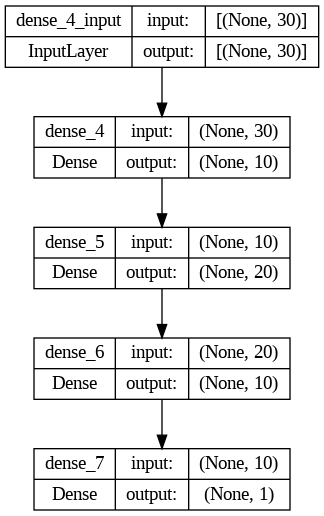

In [58]:
plot_model(cancer_model_1, show_shapes = True)

In [59]:
cancer_model_1.evaluate(nucleus_test_features, nucleus_test_labels)

4/4 [==============================] - 0s 6ms/step - loss: 0.1308 - accuracy: 0.9825


[0.13079093396663666, 0.9824561476707458]

- About a 98% accuracy

Text(0.5, 0, 'Epochs')

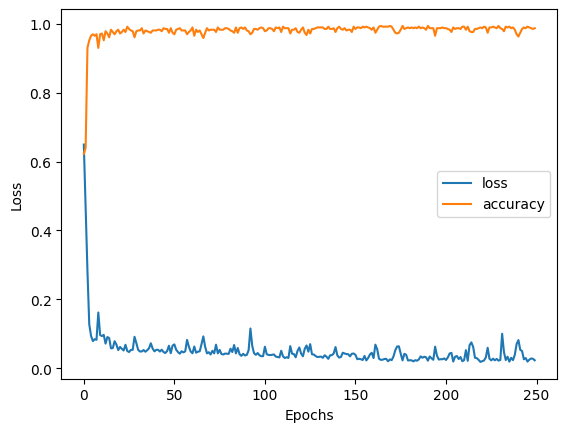

In [60]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [61]:
cancer_model_1.predict(nucleus_test_features[:5])

1/1 [==============================] - 0s 231ms/step


array([[9.9997926e-01],
       [3.0232696e-03],
       [1.7001751e-06],
       [1.2474440e-03],
       [2.9156865e-06]], dtype=float32)

# Final Analysis

In [62]:
cancer_model_1.save('Cancer-nucleus-prediction-model')

In [63]:
!ls Cancer-nucleus-prediction-model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [64]:
loaded_model = tf.keras.models.load_model('Cancer-nucleus-prediction-model')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 751 (2.93 KB)
Trainable params: 751 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
loaded_model.evaluate(nucleus_test_features, nucleus_test_labels)

4/4 [==============================] - 0s 11ms/step - loss: 0.1308 - accuracy: 0.9825


[0.13079093396663666, 0.9824561476707458]